# Mapping the Frequency of Dogs vs Trees in New York City
- Contrary to any reasonable assumptions, the number of trees does not contribute to an increase of dogs (or technically, dog licenses) in most neighborhoods in NYC.

# Import Libraries

In [220]:
import pandas as pd
import numpy as np 
import folium
import os
import geocoder
import json

# Mapping

### Load csv

In [113]:
df_tree = pd.read_csv('../data/tree.csv')
df_tree.head()

,address,bbl,bin,block_id,boro_ct,borocode,boroname,brch_light,brch_other,brch_shoe,...,trnk_other,trunk_wire,user_type,x_sp,y_sp,zip_city,zipcode,dogs_near_tree,dogs_in_zip_clusters,truncated_zip
0,108-005 70 AVENUE,4.022210e+09,4052307.0,348711,4073900,4,Queens,No,No,No,...,No,No,TreesCount Staff,1027431.148,202756.7687,Forest Hills,11375,1114.0,13781.0,113
1,147-074 7 AVENUE,4.044750e+09,4101931.0,315986,4097300,4,Queens,No,No,No,...,No,No,TreesCount Staff,1034455.701,228644.8374,Whitestone,11357,724.0,13781.0,113
2,390 MORGAN AVENUE,3.028870e+09,3338310.0,218365,3044900,3,Brooklyn,No,No,No,...,No,No,Volunteer,1001822.831,200716.8913,Brooklyn,11211,1094.0,29571.0,112
3,1027 GRAND STREET,3.029250e+09,3338342.0,217969,3044900,3,Brooklyn,No,No,No,...,No,No,Volunteer,1002420.358,199244.2531,Brooklyn,11211,1094.0,29571.0,112
4,603 6 STREET,3.010850e+09,3025654.0,223043,3016500,3,Brooklyn,No,No,No,...,No,No,Volunteer,990913.775,182202.4260,Brooklyn,11215,2036.0,29571.0,112


### Create columns to show count of trees and dogs per zip code

In [116]:
zip_df = df_tree.groupby("zipcode").describe()

tree_count_dict = {key : value for key,value in zip(zip_df.index,zip_df["bbl"]["count"])}
df_tree["trees_in_zip"] = df_tree.zipcode.map(tree_count_dict)

In [207]:
health_map = {'Poor': 0, 'Fair': 0, 'Good': 1}
df_tree['health'] = df_tree['health'].map(health_map)
zipped = df_tree.groupby('zipcode').sum()[['health']]
zip_grade_map = {key: value for key, value in zip(zipped.index, zipped['health'])}
df_tree['health'] = df_tree['health'].map(zip_grade_map)

In [208]:
df_tree_dogs = df_tree[['trees_in_zip','dogs_near_tree', 'health', 'zipcode']].drop_duplicates()

In [212]:
df_tree_dogs.fillna(0, inplace=True)

In [41]:
df_tree_dogs.head()

,dogs_near_tree,zipcode
0,1114.0,11375
1,724.0,11357
2,1094.0,11211
4,2036.0,11215
5,2294.0,10023


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3f662ba8>]],
      dtype=object)

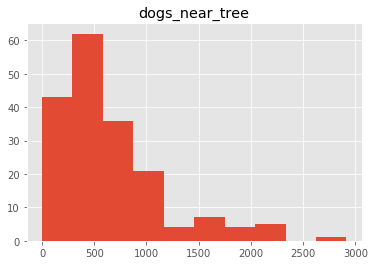

In [81]:
df_tree_dogs[['dogs_near_tree']].hist()

In [84]:
df_tree_dogs[['dogs_near_tree']].describe()

,dogs_near_tree
count,183.000000
mean,646.836066
std,512.405934
min,0.000000
25%,312.000000
50%,520.000000
75%,849.500000
max,2914.000000


In [124]:
df_tree_dogs.fillna(0, inplace=True)

In [77]:
# Get coordinates
coordinates = []
for i in range(len(df_tree_dogs)):
    g = geocoder.arcgis(df_tree_dogs['zipcode'].iloc[i])
    coordinates.append(g.latlng)

# Number of Dogs v Number of Trees in NYC
 - More trees do not correspond to more dogs

In [196]:
df_tree_dogs.fillna(0, inplace=True)

In [197]:
# Read in json map file
state_geo = os.path.join('./data', 'ny_new_york_zip_codes_geo.min.json')

# Set parameters to show map with pins where road closures are, and corresponding tweets as pop-ups
mapit = folium.Map( location=[40.77, -74], tiles="OpenStreetMap", zoom_start=12)
#state_geo = os.path.join('./data', 'us-states.json')

#I can add marker one by one on the map
for i in range(len(df_tree_dogs)):
    for col in df_tree_dogs.columns:
        if col == 'dogs_near_tree':
            folium.Circle(
                location=[coordinates[i][0], coordinates[i][1]],
                popup=(str(df_tree_dogs['dogs_near_tree'].iloc[i]) + str(" DOGS IN ") + str(df_tree_dogs['zipcode'].iloc[i])),
                radius=int(df_tree_dogs['dogs_near_tree'].iloc[i]/4),
                color='crimson',
                fill=True,
                fill_color='crimson'
        ).add_to(mapit)
        elif col == 'trees_in_zip':
            folium.Circle(
                location=[coordinates[i][0], coordinates[i][1]],
                popup=(str(df_tree_dogs['trees_in_zip'].iloc[i]) + str(" TREES IN ") + str(df_tree_dogs['zipcode'].iloc[i])),
                radius=int(df_tree_dogs['trees_in_zip'].iloc[i]/4),
                color='green',
                fill=True,
                fill_color='green'
            ).add_to(mapit)

mapit 

**View Interactive Map When Notebook is Downloaded**
- Green indicates trees, red indicates dogs
- Size of bubbles correspond to number of trees (green) and dogs (dogs)
![image](../images/map_dogs_trees_1.png)